In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
loan2 = pd.read_csv('loan.csv', low_memory=False)

In [3]:
loan2.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_description = pd.read_excel('LCDataDictionary.xlsx').dropna()
df_description.style.set_properties(subset=['Description'], **{'width': '1000px'})

,LoanStatNew,Description
0,addr_state,The state provided by the borrower in the loan application
1,annual_inc,The self-reported annual income provided by the borrower during registration.
2,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
3,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
4,collection_recovery_fee,post charge off collection fee
5,collections_12_mths_ex_med,Number of collections in 12 months excluding medical collections
6,delinq_2yrs,The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
7,desc,Loan description provided by the borrower
8,dti,"A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income."
9,dti_joint,"A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income"


In [4]:
check_null = loan2.isnull().sum(axis=0)/float(len(loan2))
check_null[check_null>0.3]

desc                           0.857977
mths_since_last_delinq         0.511971
mths_since_last_record         0.845553
mths_since_last_major_derog    0.750160
annual_inc_joint               0.999424
dti_joint                      0.999426
verification_status_joint      0.999424
open_acc_6m                    0.975916
open_il_6m                     0.975916
open_il_12m                    0.975916
open_il_24m                    0.975916
mths_since_rcnt_il             0.976549
total_bal_il                   0.975916
il_util                        0.979020
open_rv_12m                    0.975916
open_rv_24m                    0.975916
max_bal_bc                     0.975916
all_util                       0.975916
inq_fi                         0.975916
total_cu_tl                    0.975916
inq_last_12m                   0.975916
dtype: float64

In [5]:
loan2.drop(check_null[check_null>0.3].index, axis=1, inplace=True) 
loan2.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,171.62,NaN,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,119.66,NaN,Sep-2013,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,649.91,NaN,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,357.48,NaN,Jan-2015,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,67.79,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN


In [6]:
loan2.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

## 1. Univariate Analysis:

### 1.1 Quantitative Features:

**1.1.1. Column 'annual_inc'**

In [7]:
loan2.dropna(subset=['annual_inc'], axis=0, inplace = True)

C:\Users\sanjo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


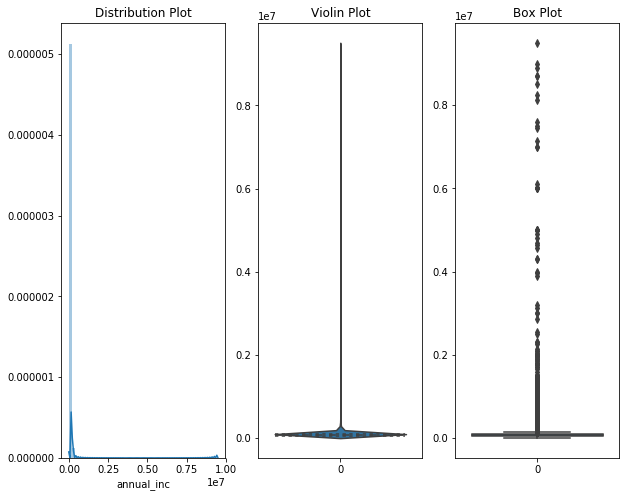

In [8]:
fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(10,8))
ax[0].set_title("Distribution Plot")
sns.distplot(loan2["annual_inc"],ax=ax[0])
ax[1].set_title("Violin Plot")
sns.violinplot(data =loan2["annual_inc"],ax=ax[1], inner="quartile")
ax[2].set_title("Box Plot")
sns.boxplot(data =loan2["annual_inc"],ax=ax[2],orient='v')
plt.show()

* This looks like a power law distribution, but it has a bump in the end, looks like there might be outliner(s). Let's check.

In [9]:
loan2["annual_inc"].describe()

count    8.873750e+05
mean     7.502759e+04
std      6.469830e+04
min      0.000000e+00
25%      4.500000e+04
50%      6.500000e+04
75%      9.000000e+04
max      9.500000e+06
Name: annual_inc, dtype: float64

* We can see that there are outliers with the max = 9600000 which is 2 decimals higher than the 75%. Let's remove outliners above 99.5%.

In [10]:
q = loan2["annual_inc"].quantile(0.995)
loan2 = loan2[loan2["annual_inc"] < q]
loan2["annual_inc"].describe()

count    882924.000000
mean      72819.815769
std       39928.399536
min           0.000000
25%       45000.000000
50%       64000.000000
75%       90000.000000
max      304800.000000
Name: annual_inc, dtype: float64

Now it looks good. Let's check the distribution again.

C:\Users\sanjo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


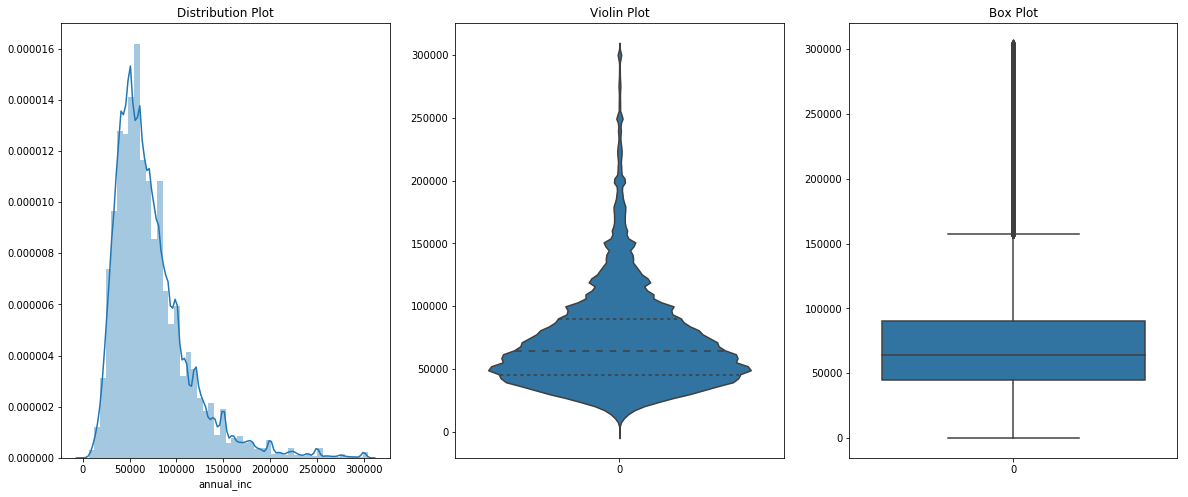

In [11]:
fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
ax[0].set_title("Distribution Plot")
sns.distplot(loan2["annual_inc"],ax=ax[0])
ax[1].set_title("Violin Plot")
sns.violinplot(data =loan2["annual_inc"],ax=ax[1], inner="quartile")
ax[2].set_title("Box Plot")
sns.boxplot(data =loan2["annual_inc"],ax=ax[2],orient='v')
plt.show()

* We can see that most of the applicants earn beteen 40000 to 90000 USD per annum.

**1.1.2. Column 'loan_amnt'**

C:\Users\sanjo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


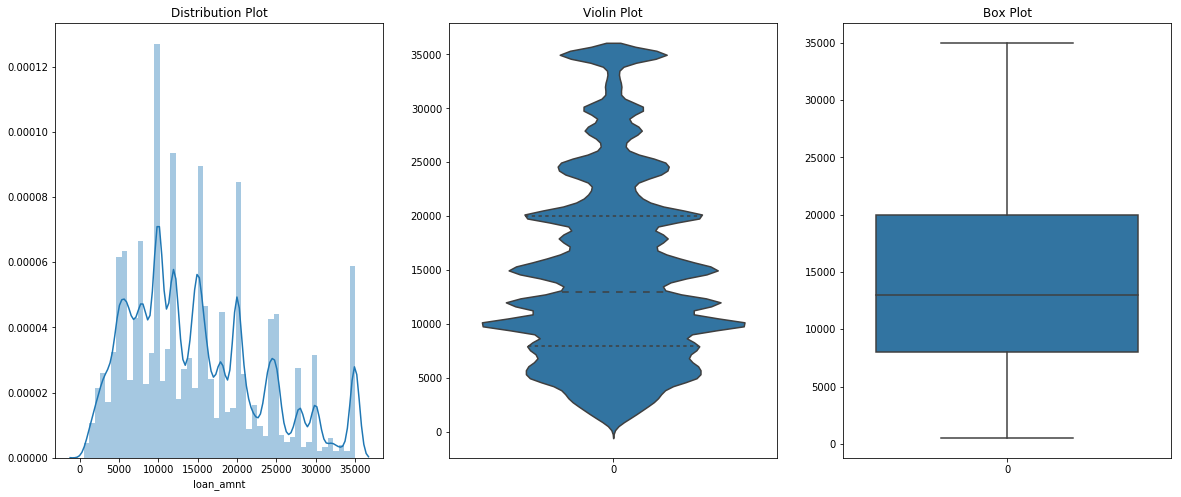

In [12]:
fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
ax[0].set_title("Distribution Plot")
sns.distplot(loan2["loan_amnt"],ax=ax[0])
ax[1].set_title("Violin Plot")
sns.violinplot(data =loan2["loan_amnt"],ax=ax[1], inner="quartile")
ax[2].set_title("Box Plot")
sns.boxplot(data =loan2["loan_amnt"],ax=ax[2],orient='v')
plt.show()

* We can see that most of the loan amounts are distributed between 7000 to 20000 USD.

**1.1.3. Column 'int_rate**

C:\Users\sanjo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


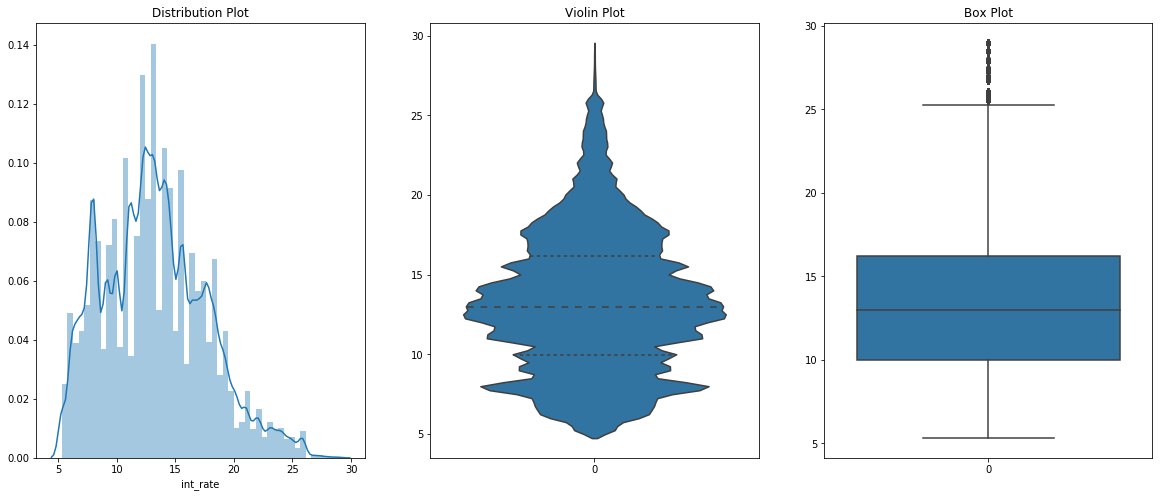

In [13]:
fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
ax[0].set_title("Distribution Plot")
sns.distplot(loan2["int_rate"],ax=ax[0])
ax[1].set_title("Violin Plot")
sns.violinplot(data =loan2["int_rate"],ax=ax[1], inner="quartile")
ax[2].set_title("Box Plot")
sns.boxplot(data =loan2["int_rate"],ax=ax[2],orient='v')
plt.show()

* Most of the interest rates are distributed between 10% to 16%.

### 1.2. Categorical Features.

**1.2.1. Loan_Status Exploration**

In [14]:
print(loan2['loan_status'].value_counts())

Current                                                598503
Fully Paid                                             206806
Charged Off                                             45147
Late (31-120 days)                                      11548
Issued                                                   8418
In Grace Period                                          6227
Late (16-30 days)                                        2345
Does not meet the credit policy. Status:Fully Paid       1965
Default                                                  1213
Does not meet the credit policy. Status:Charged Off       752
Name: loan_status, dtype: int64


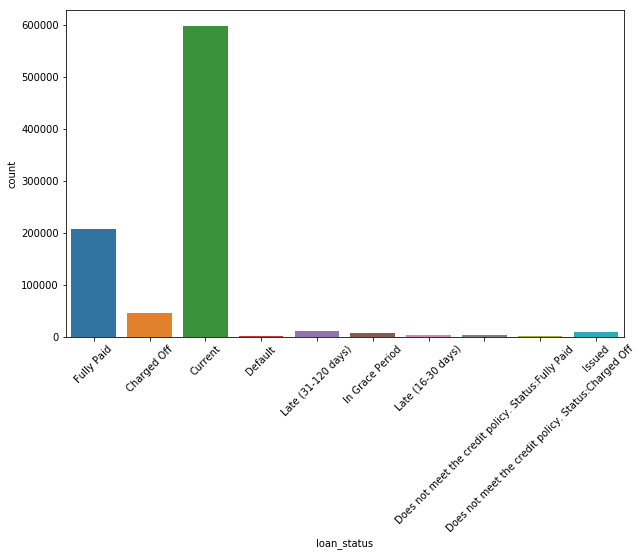

In [15]:
# Barplot.
plt.figure(figsize=(10,6))
sns.countplot(x='loan_status', data=loan2)
plt.xticks(rotation=45)
plt.show()

* Let's keep in mind that our target variable 'loan_status' needs just 2 variables - the defaulters and the non-defaulters.
* Considering only Defaulters and Non-Defaulters or their potential correspondents i.e. delete those who are still currently under the loan process.

In [16]:
loan2 = loan2[~loan2['loan_status'].str.contains("Current")]
loan2 = loan2[~loan2['loan_status'].str.contains("Issued")]
loan2 = loan2[~loan2['loan_status'].str.contains("In Grace Period")]

In [17]:
loan2['loan_status'].value_counts()

Fully Paid                                             206806
Charged Off                                             45147
Late (31-120 days)                                      11548
Late (16-30 days)                                        2345
Does not meet the credit policy. Status:Fully Paid       1965
Default                                                  1213
Does not meet the credit policy. Status:Charged Off       752
Name: loan_status, dtype: int64

* Making a separate column 'Default_Binary' which consists of Defaulters (1) and non-Defaulters (0).

In [18]:
loan2['Default_Binary'] = int(0)
for index, value in loan2['loan_status'].iteritems():
    if value == 'Default':
        loan2.set_value(index,'Default_Binary',int(1))
    if value == 'Charged Off':
        loan2.set_value(index, 'Default_Binary',int(1))
    if value == 'Late (31-120 days)':
        loan2.set_value(index, 'Default_Binary',int(1))    
    if value == 'Late (16-30 days)':
        loan2.set_value(index, 'Default_Binary',int(1))
    if value == 'Does not meet the credit policy. Status:Charged Off':
        loan2.set_value(index, 'Default_Binary',int(1))

C:\Users\sanjo\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\sanjo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.
C:\Users\sanjo\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\sanjo\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
C:\Users\sanjo\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed

In [19]:
# We can see the distribution of Defaulters (1) and Non-Defaulters (0).
loan2['Default_Binary'].value_counts()

0    208771
1     61005
Name: Default_Binary, dtype: int64

In [20]:
loan2['Default_Binary']=loan2['Default_Binary'].apply(str)

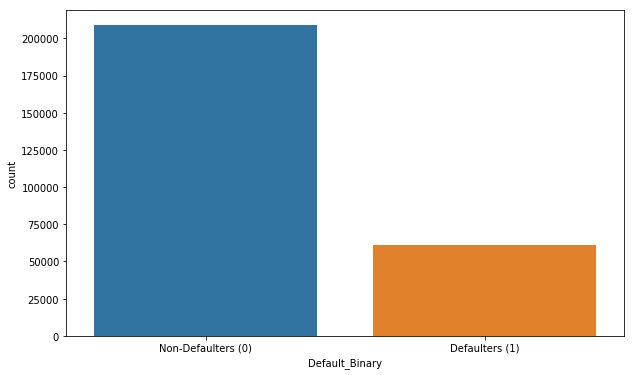

In [21]:
plt.figure(figsize=(10,6))
default = sns.countplot(x="Default_Binary", data=loan2)
default.set_xticklabels(['Non-Defaulters (0)','Defaulters (1)'])
plt.show()

* We can see 22.63% are Defaulters.

## 2. Multivariate Analysis:

### 2.1. Quantitative–Quantitative:

**2.1.1. Correlation Matrix:**

In [22]:
loan2['emp_length'].unique()

array(['10+ years', '< 1 year', '3 years', '9 years', '4 years',
       '5 years', '1 year', '6 years', '2 years', '7 years', '8 years',
       nan], dtype=object)

In [23]:
# Drop non-numerical variables
numerical = list(set(loan2[['loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'int_rate', 'installment','annual_inc','out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee','tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']]))

In [24]:
# Calculate Correlation Matrix
corr_matrix = loan2[numerical].corr()

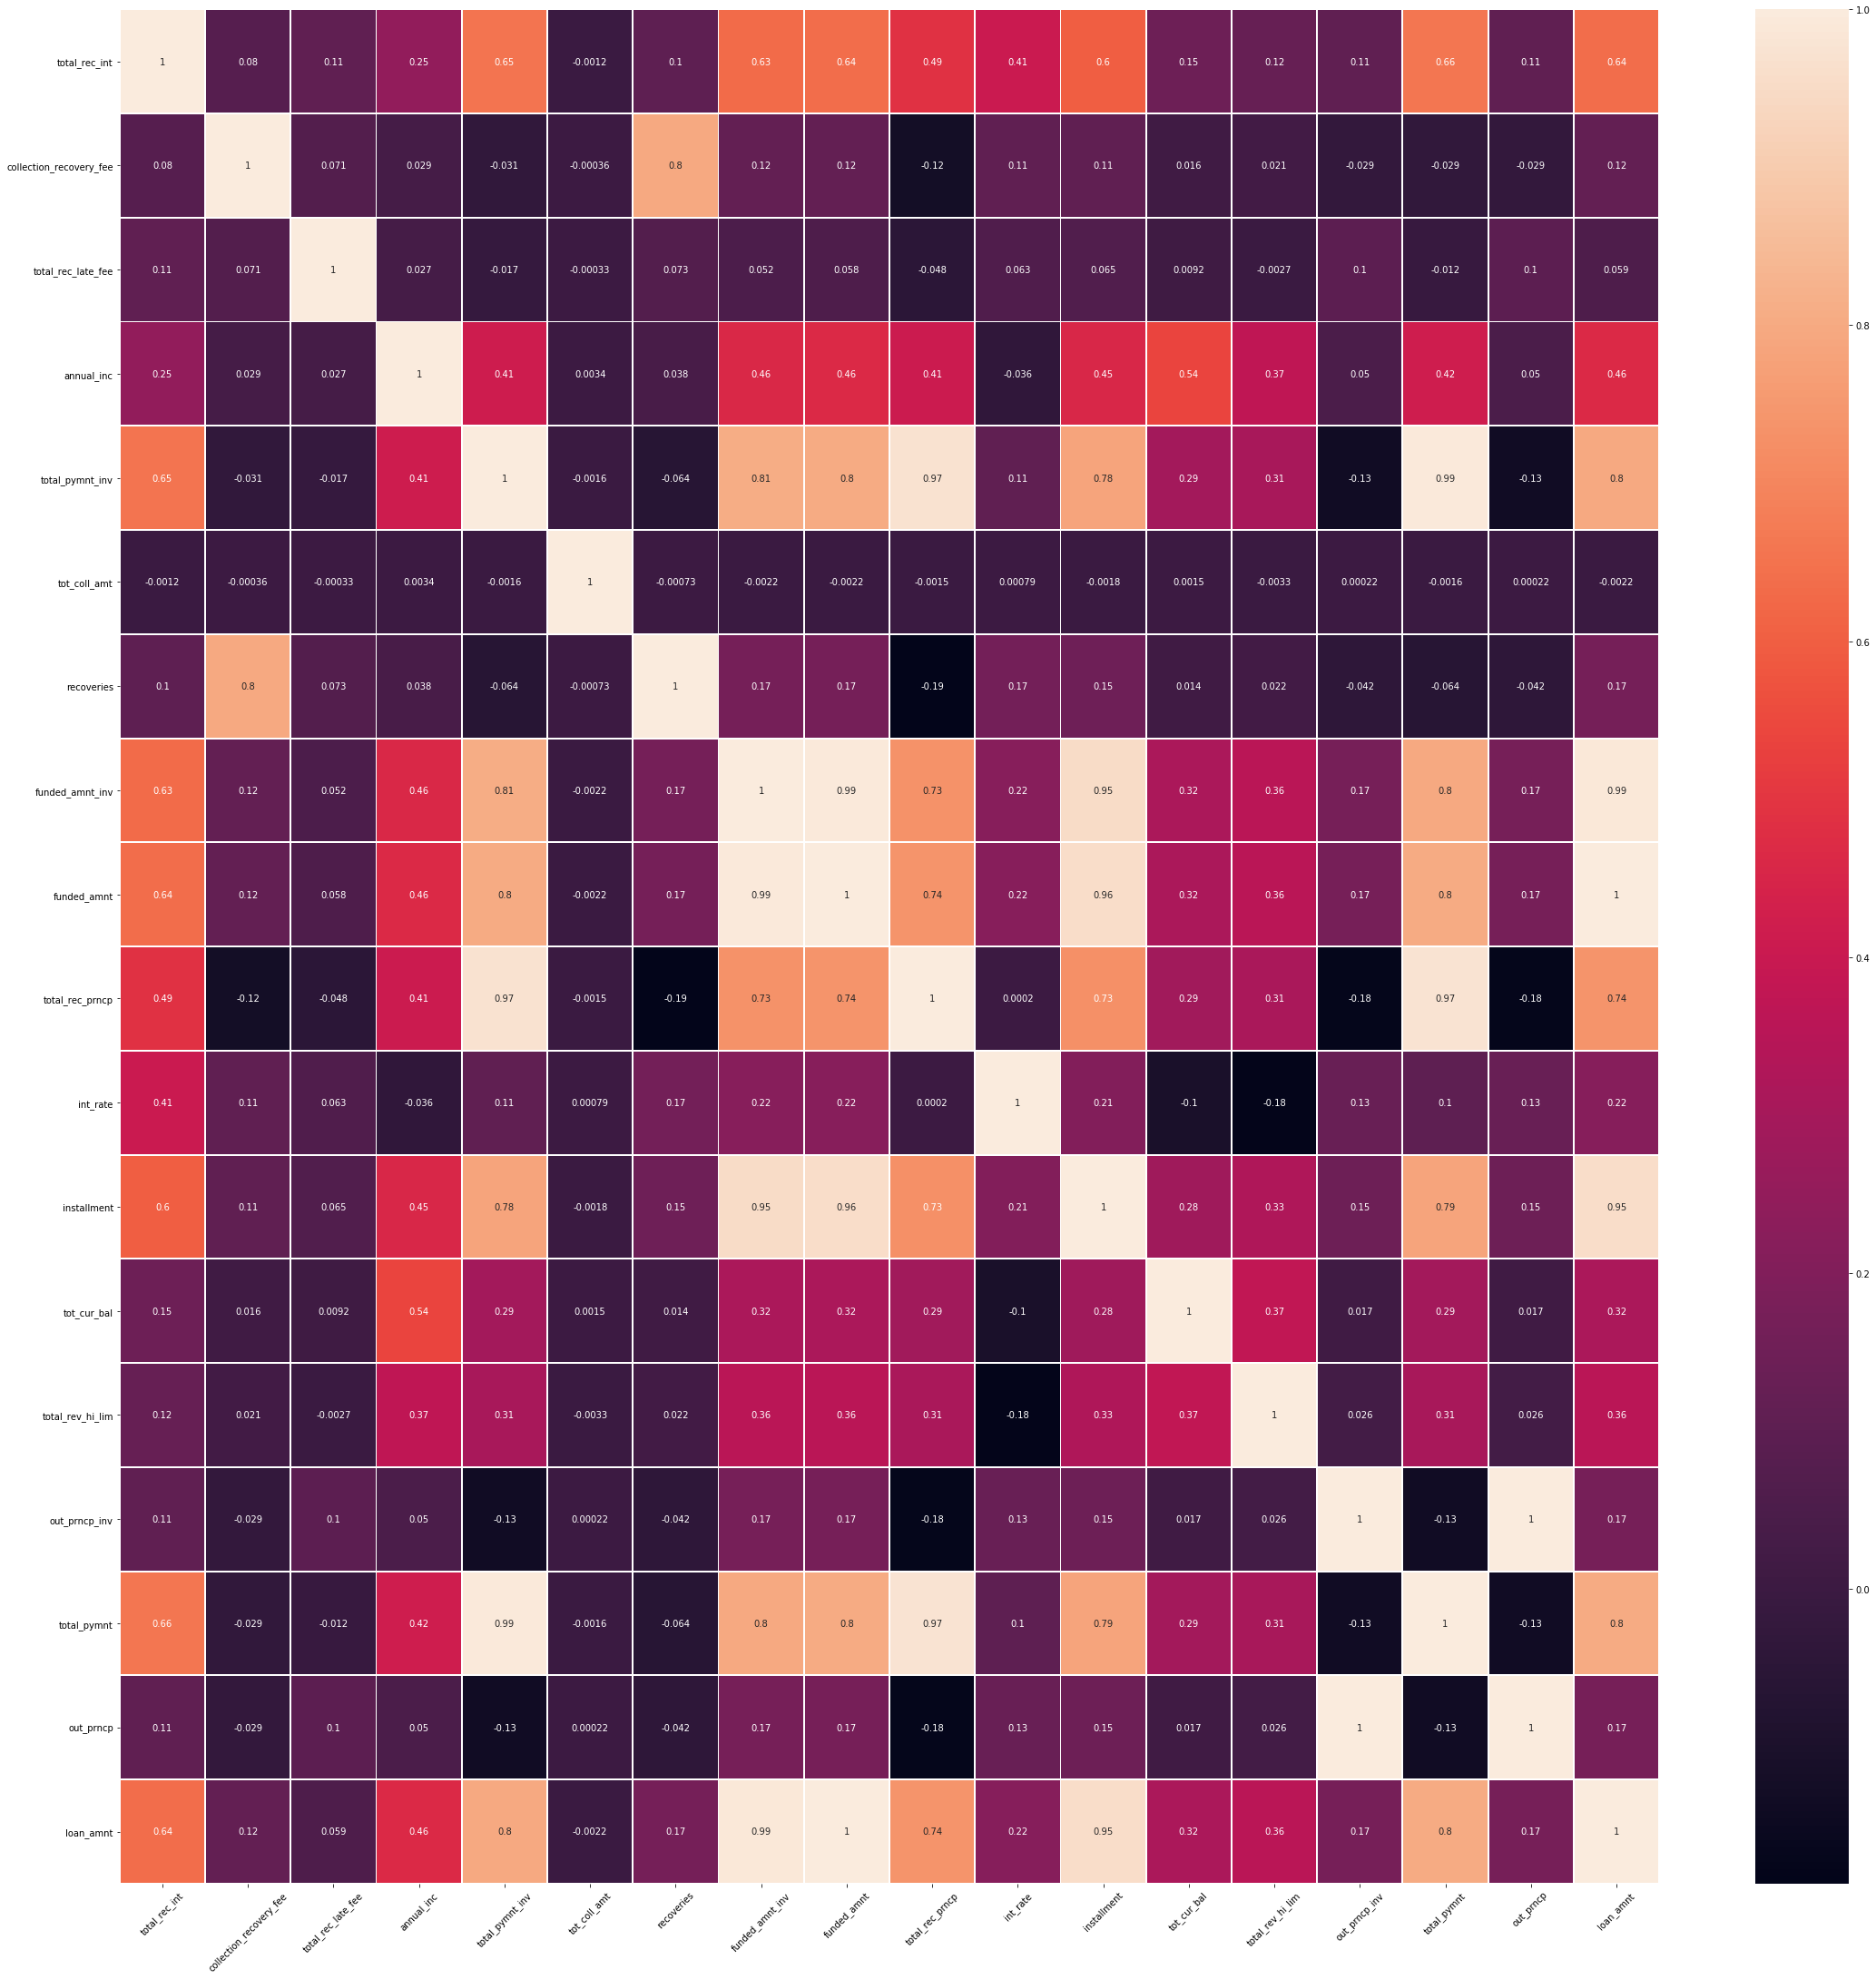

In [25]:
# Plot heatmap
plt.figure(figsize = (38,38))
sns.heatmap(corr_matrix, xticklabels=True, yticklabels=True, linewidths=0.9, annot=True)
plt.xticks(rotation=45)
plt.show()

<Figure size 5760x2880 with 0 Axes>

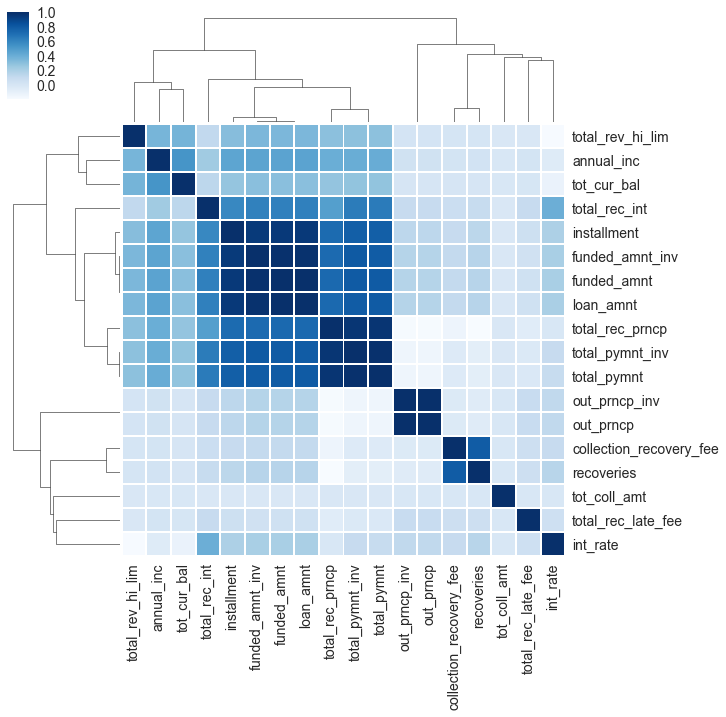

In [26]:
plt.figure(figsize = (80,40))
sns.set(font_scale=1.4)
cmap = sns.diverging_palette(h_neg=210, h_pos=350, s=90, l=30, as_cmap=True, sep=15)
sns.clustermap(data=corr_matrix, annot=False, cmap="Blues", linewidths=0.9)

* From the colored correlation matrix generated above, we can see that there are a few variables such as 'funded_amnt' that have been calculated directly from 'loan_amnt'. These are dependent variables and can therefore be left out since they do not contribute any additional information. So we can get rid of one of those variables.

In [27]:
numerical = list(set(numerical) - 
                 set(['total_pymnt_inv','funded_amnt_inv','collection_recovery_fee','total_rec_late_fee',
                      'out_prncp_inv','total_rec_prncp','funded_amnt']))

In [52]:
loan2['Default_Binary'] = loan2['Default_Binary'].apply(int)

In [53]:
corr = loan2.corr()['Default_Binary'].sort_values()
# Display correlations
print('Most Positive Correlations:\n', corr.tail(10))
print('\nMost Negative Correlations:\n', corr.head(10))

Most Positive Correlations:
 revol_util                 0.100758
dti                        0.136089
total_rec_late_fee         0.163951
int_rate                   0.256682
collection_recovery_fee    0.262028
out_prncp_inv              0.372274
out_prncp                  0.372275
recoveries                 0.382272
Default_Binary             1.000000
policy_code                     NaN
Name: Default_Binary, dtype: float64

Most Negative Correlations:
 total_rec_prncp    -0.491374
last_pymnt_amnt    -0.417653
total_pymnt        -0.388852
total_pymnt_inv    -0.385769
tot_cur_bal        -0.078733
annual_inc         -0.075792
total_rev_hi_lim   -0.058646
total_acc          -0.026804
tot_coll_amt       -0.001361
revol_bal          -0.001114
Name: Default_Binary, dtype: float64


In [28]:
# Calculating total null values in the 'numerical' columns.
loan2[numerical].isna().sum()

total_rec_int           0
annual_inc              0
tot_coll_amt        66350
recoveries              0
int_rate                0
installment             0
tot_cur_bal         66350
total_rev_hi_lim    66350
total_pymnt             0
out_prncp               0
loan_amnt               0
dtype: int64

**2.1.2. Scatter Plot:**

In [29]:
# Dropping the null values.
nums=loan2[numerical].dropna()

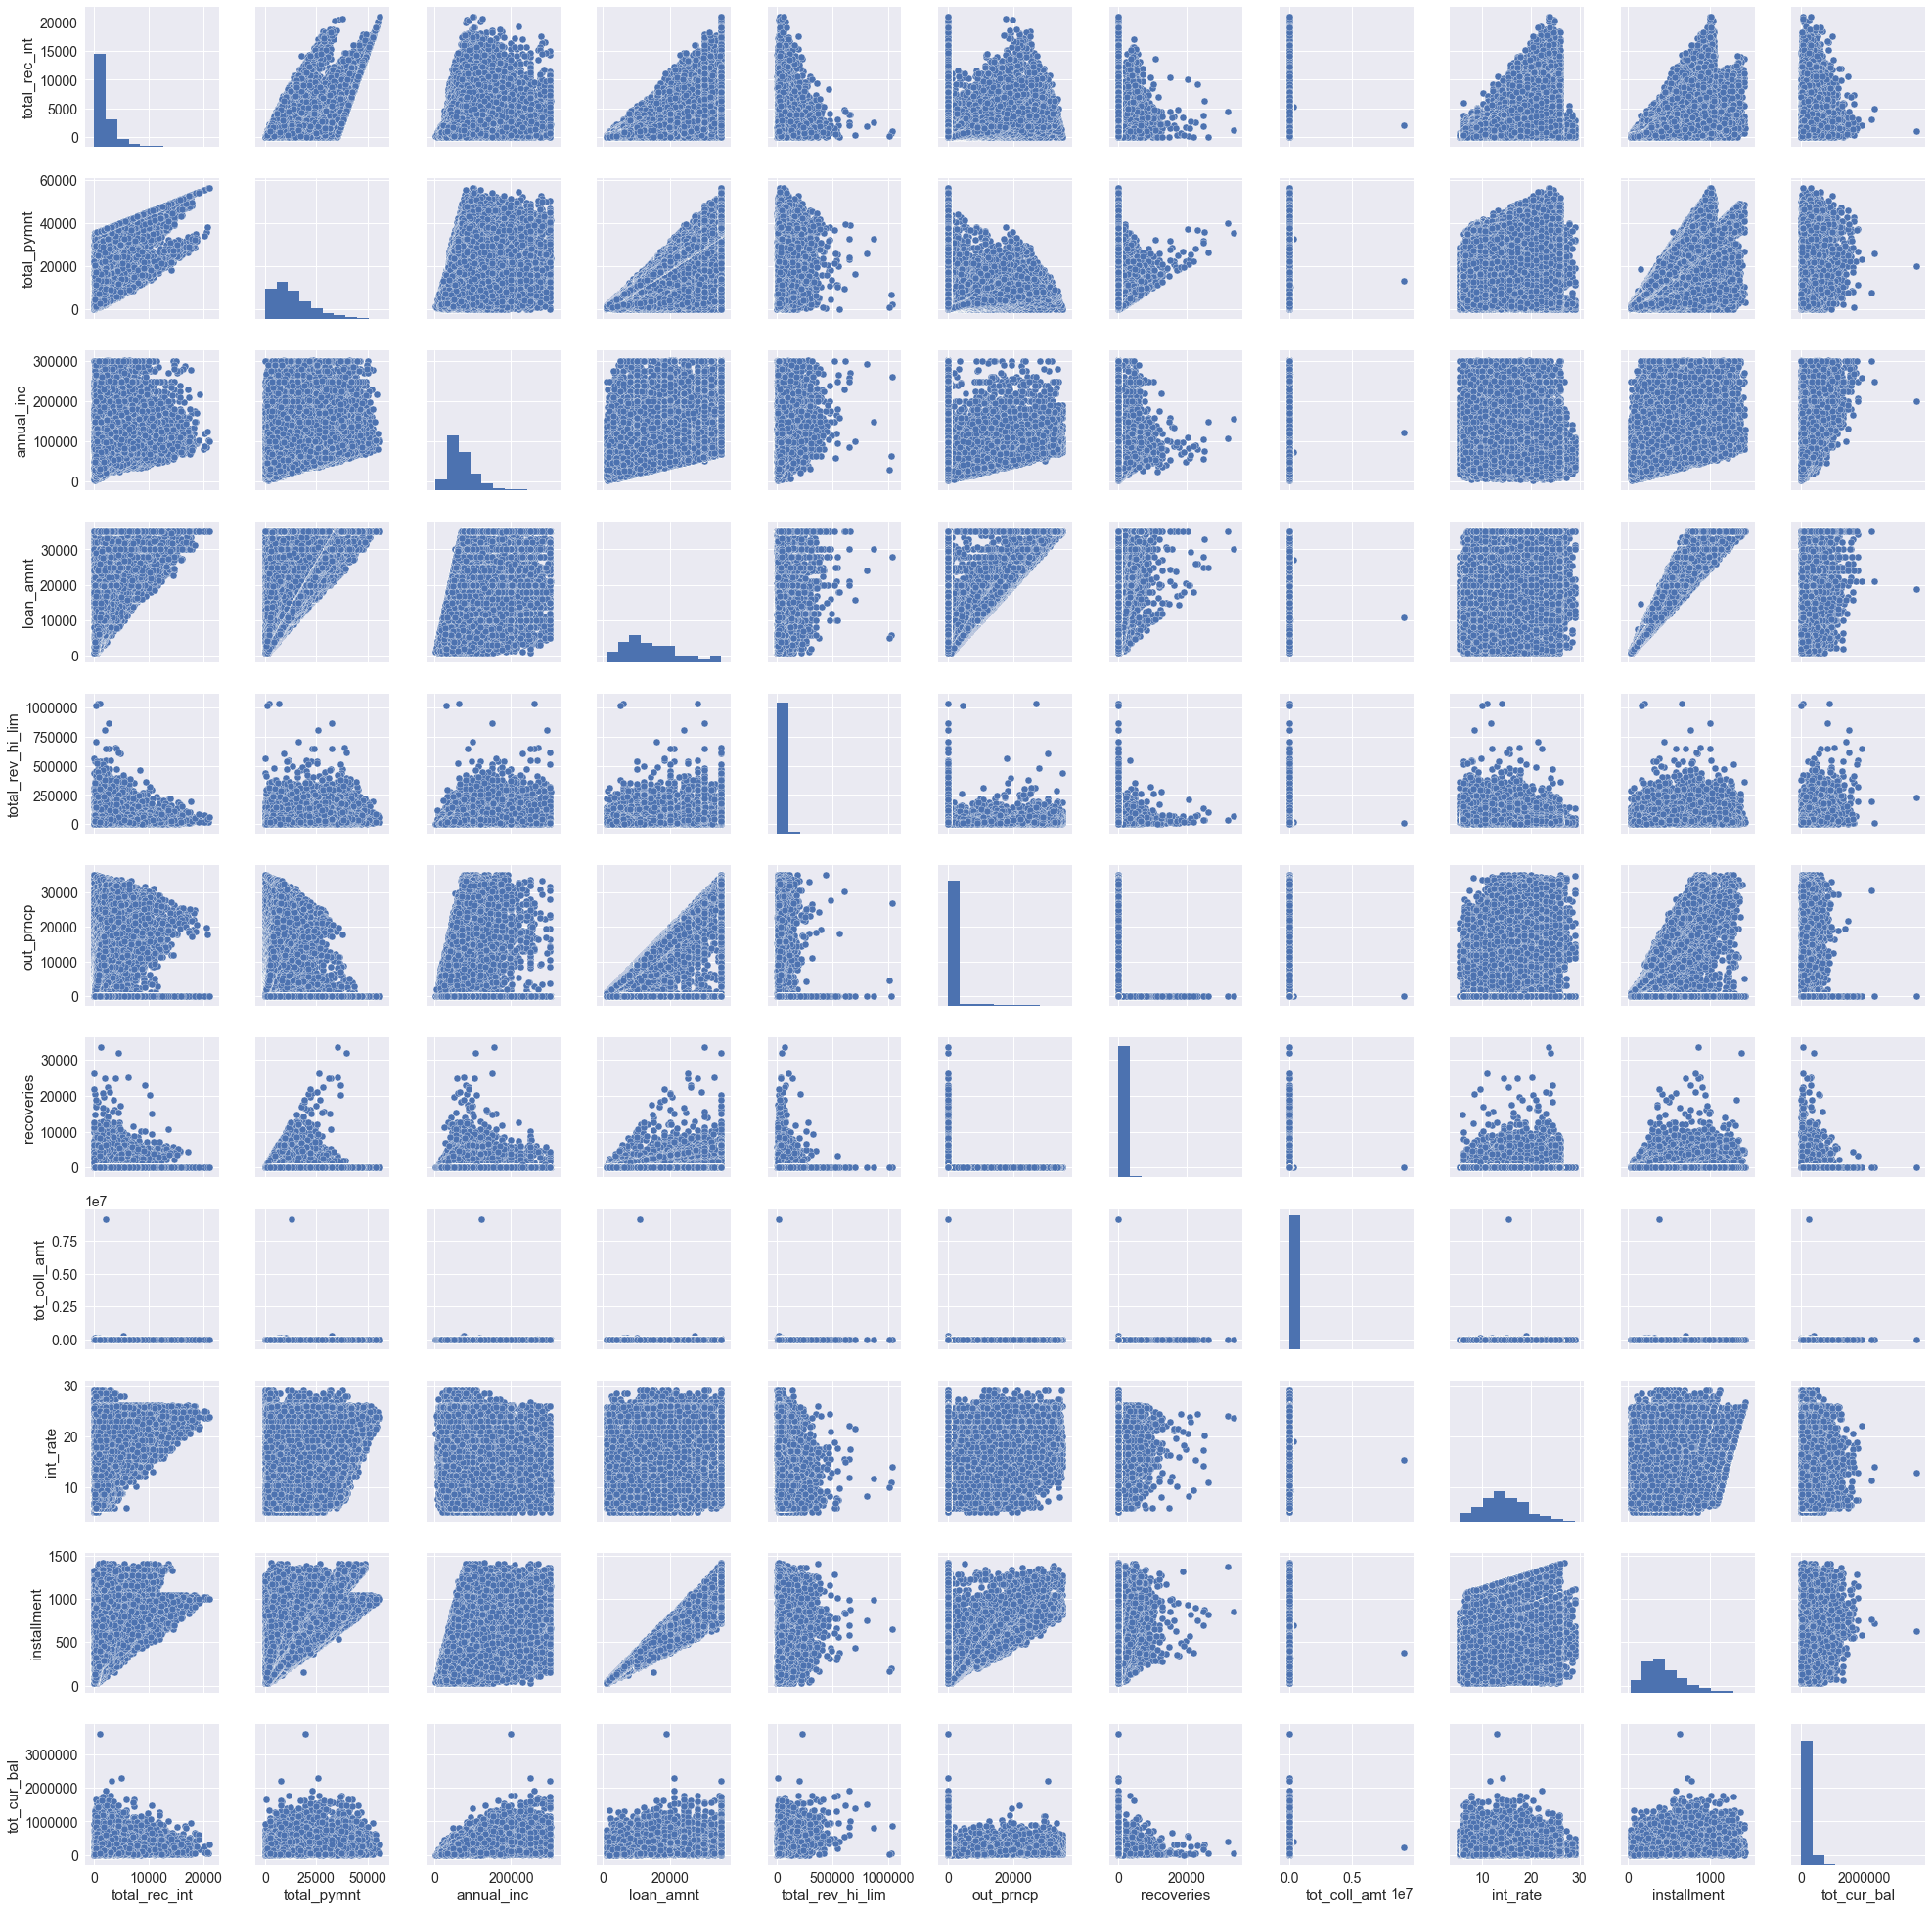

In [30]:
%config InlineBackend.figure_format = 'png'
sns.pairplot(nums)

* We can see that 'tot_coll_amnt' and 'recoveries' do not give significant plots, hence we can drop them.

In [30]:
numerical = list(set(numerical) - 
                 set(['tot_coll_amnt','recoveries']))

### 2.2. Quantitative–Categorical: 

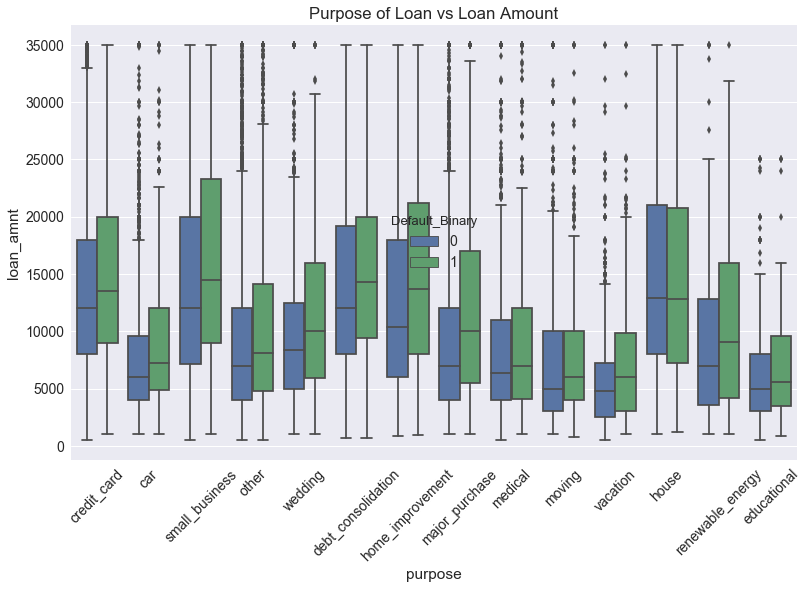

In [31]:
plt.figure(figsize=(13,8))
sns.boxplot(data =loan2, x='purpose', y='loan_amnt', hue ='Default_Binary')
plt.title('Purpose of Loan vs Loan Amount')
plt.xticks(rotation=45)
plt.show()

* We can see that the applicants who take loans for the purpose of starting a small business not only take the biggest loan amounts but also tend to not pay the loan back. So we have to be carefull giving loans to those people.

* Also the applicants who take loans to buy extremely expensive goods, are more susceptible to defaults. They tend to be careless and we should be careful giving them loans.


### 2.3. Categorical-Categorical:

In [33]:
# Function to plot count plots.
def countplots(df,col,hue=None):     
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 6 + 4*len(temp.unique())
    fig.set_size_inches(width , 7)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue) 
    for p in ax.patches:
        ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan2))), (p.get_x()+0.05, p.get_height()+20))  
    del temp
    plt.show()

**2.3.1. Purpose of taking loan vs Defaulters:**

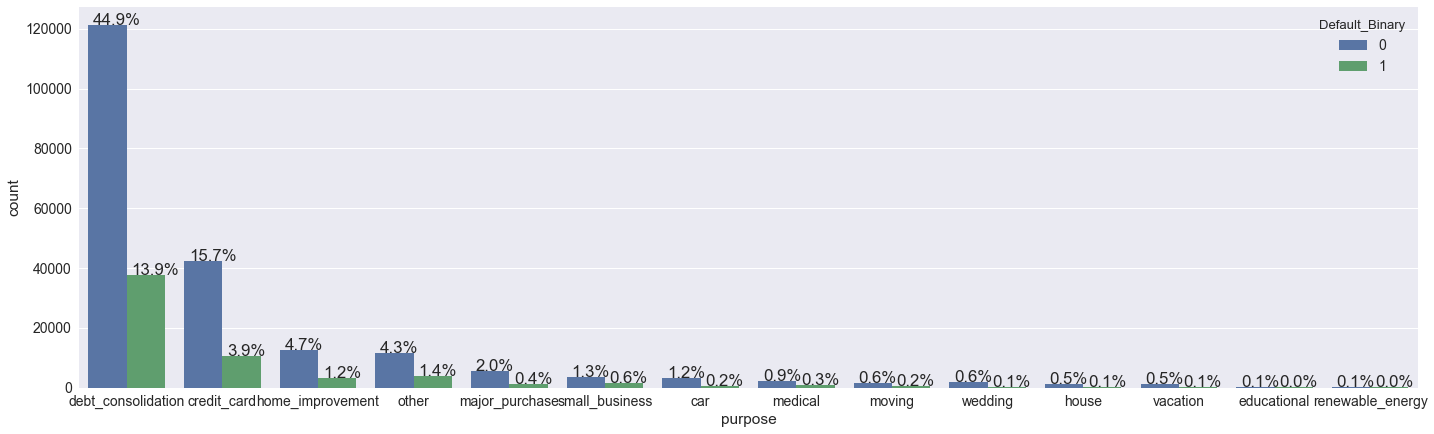

In [34]:
countplots(loan2, 'purpose', hue='Default_Binary')

* We can see that 58.8% of the applicants applied loan for paying their other loans i.e. Debt Consolidation/..

**2.3.2. Grade scores of the applicants vs Defaulters:**

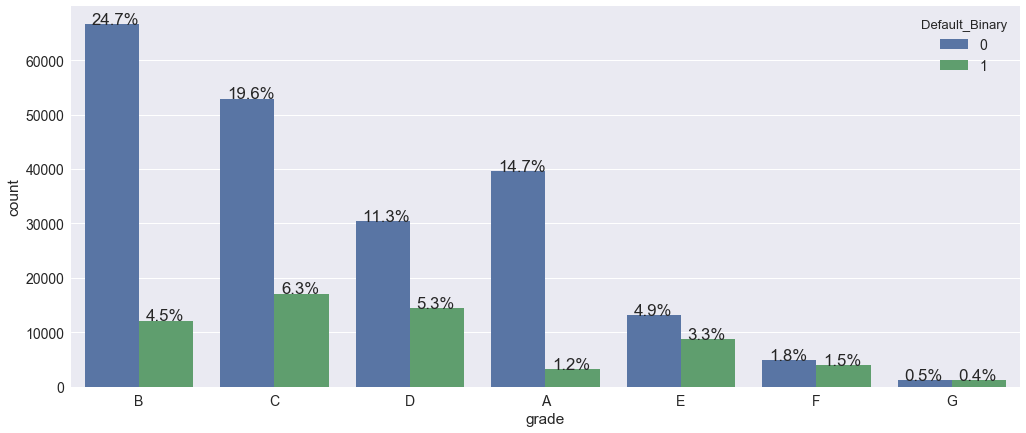

In [35]:
countplots(loan2, 'grade', hue='Default_Binary')

* We can see that applicants with good to medium grade scores i.e. A to D take most number of loans but the probability of an applicant defaulting is more towards applicants with lower grade scores i.e. grades E, F, G.


**2.2.3. Different month loan terms vs Defaulters**

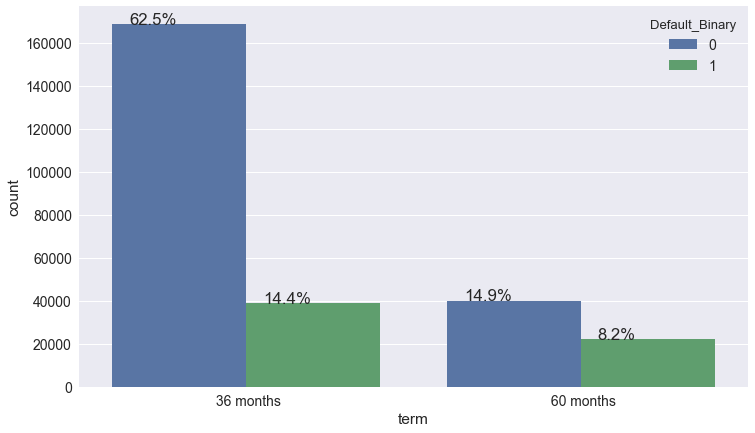

In [36]:
countplots(loan2, 'term', hue='Default_Binary')

* We can see that 76.9% applicants had applied loan for 36months term and 23.1% applicants had applied loan for 36months but the percentage of defaulters are more for those applicants who took loan for 60 months term.



In [38]:
# Function for contingency tables of columns vs Defaulters.
def crosstable(df,col): #df: the dataframe, col: The column that we want to view. 
    crosstable = pd.crosstab(df[col], df['Default_Binary'],margins=True,dropna=True)
    crosstable['Probability_Defaulters'] = round((crosstable['1']/crosstable['All']),3)
    crosstable = crosstable[0:-1]
    return crosstable

In [39]:
# Function to plot the probabilty of an applicant defaulting.
def plot_prob(df,col,stacked= True):
    
    # get dataframe from crosstab function
    plotCrosstab = crosstable(df,col)
    
    linePlot = plotCrosstab[['Probability_Defaulters']]      
    barPlot =  plotCrosstab.iloc[:,0:2]
    ax = linePlot.plot(figsize=(20,8), marker='o',color = 'b')
    ax2 = barPlot.plot(kind='bar',ax = ax,rot=1,secondary_y=True,stacked=stacked)
    ax.set_title(df[col].name.title()+' vs Probability Defaulters',fontsize=20,weight="bold")
    ax.set_xlabel(df[col].name.title(),fontsize=14)
    plt.xticks(rotation=45)
    ax.set_ylabel('Probability Defaulters',color = 'b',fontsize=14)
    ax2.set_ylabel('Number of Applicants',color = 'g',fontsize=14)
    
    plt.show()

#### 2.2.4. Purpose to take the loan vs probability of defaulting:

In [40]:
purpose=crosstable(loan2, 'purpose')
display(purpose)

Default_Binary,0,1,All,Probability_Defaulters
purpose,,,,
car,3240,555,3795,0.146
credit_card,42378,10574,52952,0.200
debt_consolidation,121183,37539,158722,0.237
educational,333,88,421,0.209
home_improvement,12609,3164,15773,0.201
house,1386,380,1766,0.215
major_purchase,5460,1162,6622,0.175
medical,2302,745,3047,0.245
moving,1621,562,2183,0.257


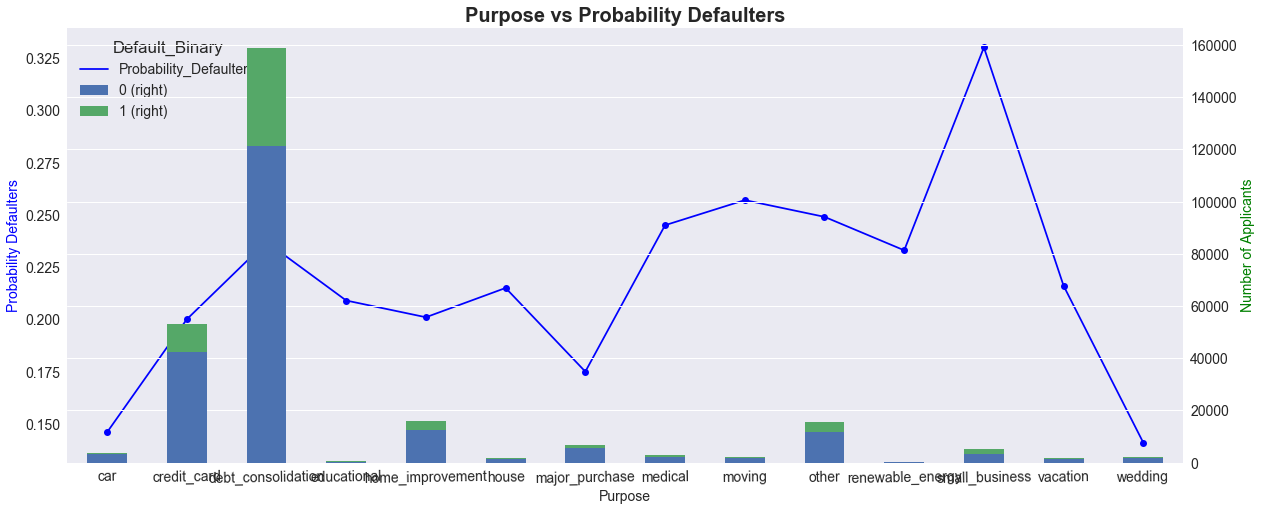

In [41]:
plot_prob(loan2, 'purpose')

* We can see that probability of Defaulting is highest amongst those applicants who take loan to start a small business, while minor loans such as for cars, wedding are usually paid off.

#### 2.2.5. Grade scores vs Probability of Defaulters:

Default_Binary,0,1,All,Probability_Defaulters
grade,,,,
A,39558,3289,42847,0.077
B,66568,12176,78744,0.155
C,52929,17120,70049,0.244
D,30388,14421,44809,0.322
E,13232,8811,22043,0.400
F,4849,4022,8871,0.453
G,1247,1166,2413,0.483


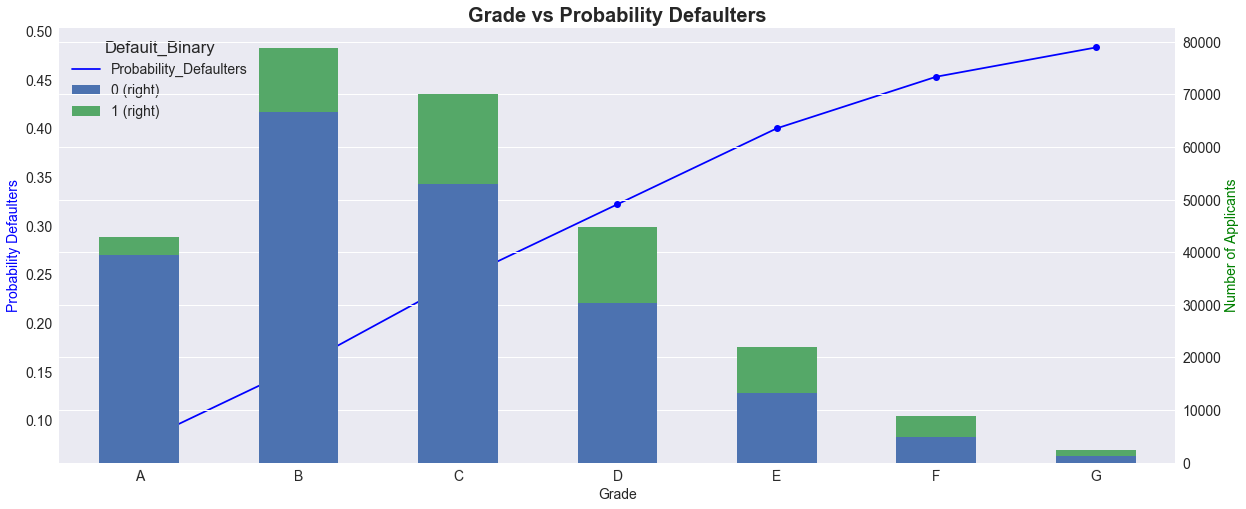

In [42]:
purpose=crosstable(loan2, 'grade')
display(purpose)
plot_prob(loan2, 'grade')

* Loan grading involves assigning a quality score to a loan based on credit history, quality of collateral and likelihood of repayment. Here grades are sorted in Alphabetical order, i.e. grade A has higher score than grade B and vice versa.

* We can analyze from the above plot that as the grade scores decrease from A to G, the probability of applicants defaulting increases.

**2.2.6. Number of 'term' payments on the loan vs Defaulters:**

Default_Binary,0,1,All,Probability_Defaulters
term,,,,
36 months,168647,38836,207483,0.187
60 months,40124,22169,62293,0.356


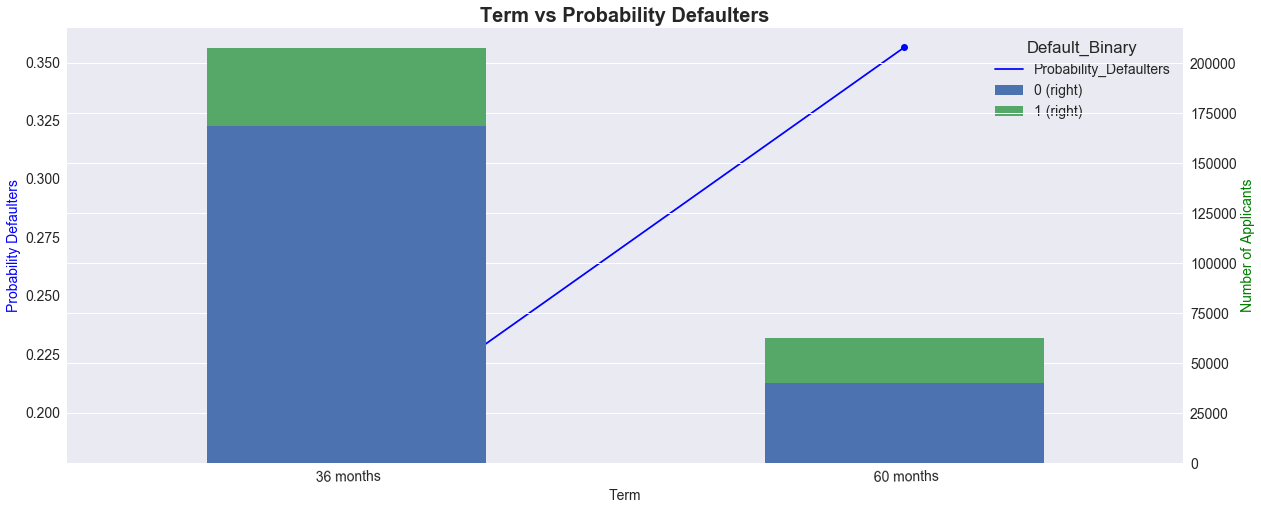

In [43]:
purpose=crosstable(loan2, 'term')
display(purpose)
plot_prob(loan2, 'term')

* The probability of an applicant defaulting is higher when the number of payments on the loan ('term'), is 60 months than than 36 months.

**2.2.7. Employment Length vs Defaulters:** 

Default_Binary,0,1,All,Probability_Defaulters
emp_length,,,,
1 year,14098,4065,18163,0.224
10+ years,63707,17823,81530,0.219
2 years,19703,5447,25150,0.217
3 years,16958,4814,21772,0.221
4 years,13513,3712,17225,0.216
5 years,14919,4161,19080,0.218
6 years,12108,3508,15616,0.225
7 years,11504,3403,14907,0.228
8 years,9723,2916,12639,0.231


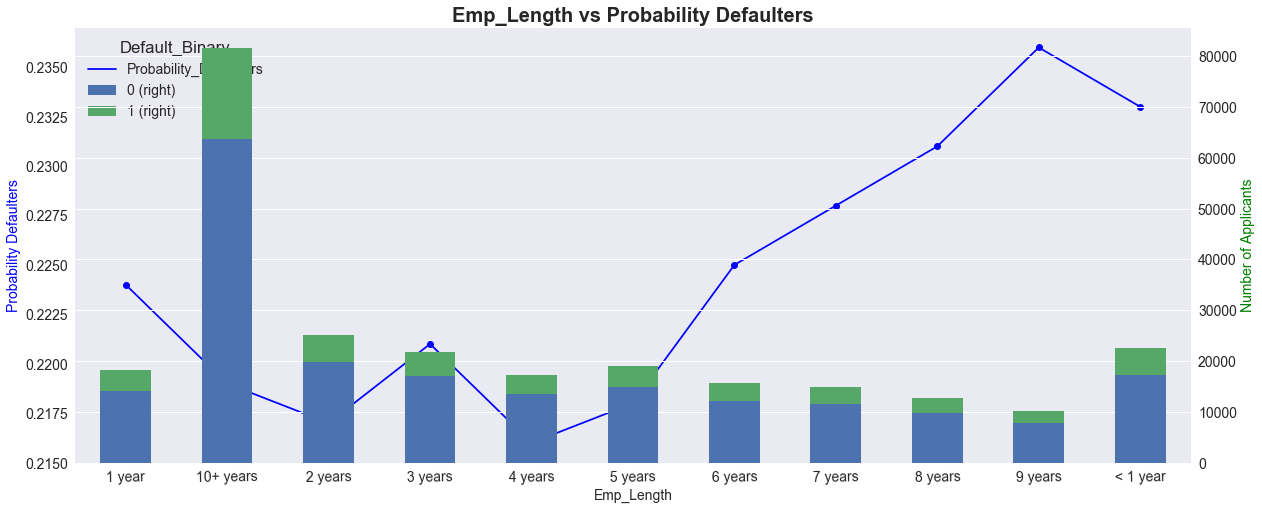

In [44]:
purpose=crosstable(loan2, 'emp_length')
display(purpose)
plot_prob(loan2, 'emp_length')

* We can see that applicants with employment length between 5-9 years are more probable of being defaulters.

## Conclusion:

**- Our target variable is:** 
*Default_Binary.* 

**- Some of the most important features to consider are:**
1. *Emp_Length*
2. *term*
3. *loan_amnt*
4. *grade*
5. *int_rate*
6. *purpose*
7. *annual_inc*

In [31]:
loan2.to_csv('new_loan.csv', index = False)